# Exploration of Non Text Features 



In [223]:
import os
import pandas as pd
import numpy as np

In [246]:
%matplotlib inline

# plotting magic

from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

In [225]:
# Load all od the data into a DataFrame for easy manipulation
base = "/Users/JasonLiu/Downloads/drinking/predict/"
df = pd.concat([pd.DataFrame.from_csv(base+f) for f in os.listdir(base)])

In [226]:
# Create a series that converts the `created_at` column into
# timeseries index, errors=1 amd coerse=1 since there are some errors in our data...
tm = pd.to_datetime(df.created_at, errors=1, coerce=1)

In [227]:
# Unfortunate newlineing csv reading bugs... oh well.
tm[tm.isnull()].head(5)

_id
https://t.co/R5odUktaJJ        NaT
#cats http://t.co/RFl0pLWAxE   NaT
#ThisDayInNBAHistory           NaT
#YallYounginsDontEvenKnow      NaT
#ShrugGame                     NaT
Name: created_at, dtype: datetime64[ns]

In [228]:
df["time"] = tm                              # set time to the timeseries
df = df[~tm.isnull()]                        # remove NaT columns
dt = df.set_index("time")                    # set the TimeSeries index
dt["dayofweek"] = dt.index.dayofweek         # set day of week
dt["hourofday"] = dt.index.hour              # set hour of day

# Helpers and Plotters

In [124]:
def interval_sum(a, b):
    return lambda x: np.sum((a < x) & (x < b))

In [333]:
def groupby(table, key, predict_thres=.7):
    gb = table.groupby(key).agg({
        "user":len,
        "predict": interval_sum(0.70, 1.0)
    })
    gb.columns = ["Drinking Tweets", "All Tweets"]
    gb["Drinking Tweets"] /= gb["Drinking Tweets"].sum()
    gb["All Tweets"] /= gb["All Tweets"].sum()
    return gb

def plot_groupby(gb, title, diff=False, kind="bar", **kwargs):
    ax = ((gb["Drinking Tweets"] - gb["All Tweets"]) if diff else gb).plot(
            title=title,
            kind=kind,
            **kwargs
        )
    return ax

## Index vs Day of Week


In [235]:
dayofweek = groupby(dt, "dayofweek")

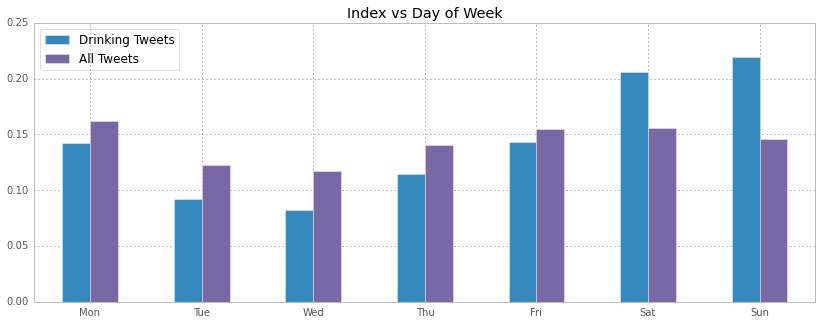

In [249]:
ax = plot_groupby(dayofweek, "Index vs Day of Week")
ax.set_xticklabels(
    ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    rotation=0)
ax.set_xlabel("")
ax

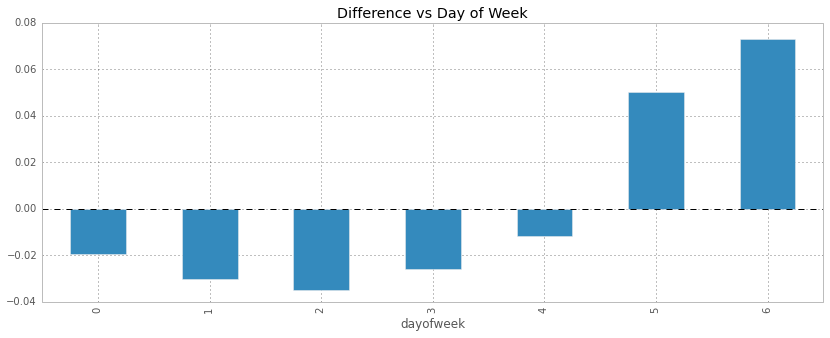

In [252]:
ax = plot_groupby(dayofweek, "Difference vs Day of Week", diff=1)

## Index vs Time of Day

In [253]:
hourofday = groupby(dt, "hourofday")

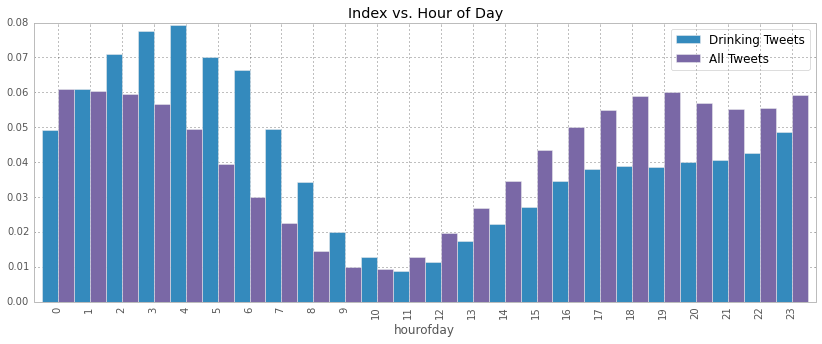

In [336]:
plot_groupby(hourofday, "Index vs. Hour of Day", width=1)

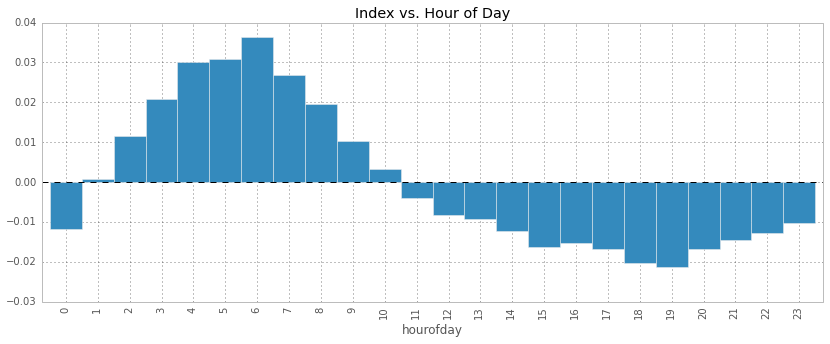

In [337]:
plot_groupby(hourofday, "Index vs. Hour of Day", diff=1, width=1)

## Index vs (Day of Week*Time of Day)

In [346]:
dayhour = groupby(dt, ["dayofweek", "hourofday"])

xt  = list(range(0, 7*24))[::12]
xtl = list(
        map(", ".join,
             product(
                ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
                map(str, range(0, 24)))))[::12]

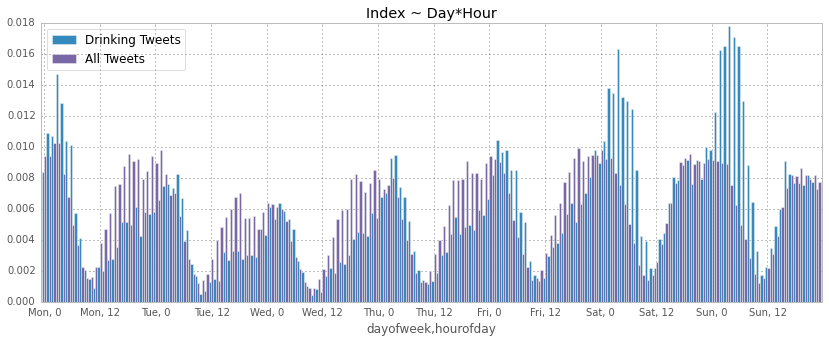

In [349]:
ax = plot_groupby(dayhour, "Index ~ Day*Hour", kind="bar", width=1)
ax.set_xticks(xt)
ax.set_xticklabels(xtl, rotation=0)
print()

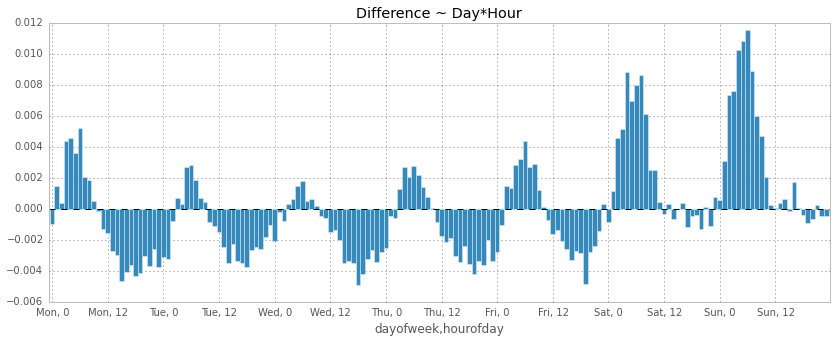

In [350]:
from itertools import product

ax = plot_groupby(dayhour, "Difference ~ Day*Hour", kind="bar", diff=1, width=1)
ax.set_xticks(xt)
ax.set_xticklabels(xtl, rotation=0)
print()

## Index vs (users/reputation)

In [389]:
lst = dt.user.apply(str).apply(eval)

In [ ]:
print()

## Index vs (user/created_at) 

## Index vs (Place/Location/State)

There are some questions about causation or whether to include this in the model.